## CSCI S-89A: Assignment 1
### Yinan Kang 

In [64]:
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import udhr
from nltk.corpus import wordnet as wn

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Problem 1 

First cell below contains code and output, but following that contains a table summarizing results 

1781

1724

1972

1521

533

595

785

579

4.644020213363279
4.864849187935035
4.217545638945233
5.631821170282708


67

94

72

60

26.582089552238806

18.340425531914892

27.38888888888889

25.35

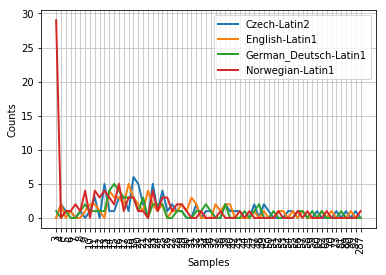

In [65]:
# udhr.fileids()[0:200]
# Selecting 4 languages: 
languages = ['English-Latin1','Norwegian-Latin1','Czech-Latin2','German_Deutsch-Latin1']

# Number of Words
for lang in languages: 
    len(nltk.corpus.udhr.words(lang))

# Number of Unique Words
for lang in languages:
    len(set(udhr.words(lang)))
    
# Average Length of Words
for lang in languages:
    word_length = [len(w) for w in udhr.words(lang)]
    avg_word_length = np.mean(word_length)
    print(avg_word_length)
    
# Number of Sentences
for lang in languages:
    len(udhr.sents(lang))
    
# Average Words per Sentence
for lang in languages:
    len(udhr.words(lang)) / len(udhr.sents(lang))

cfd = nltk.ConditionalFreqDist(
    (lang, len(sents))
    for lang in languages
    for sents in udhr.sents(lang))
cfd.plot(cumulative = False)



Table Summarizing Results: 

|                       | # of Words | # Unique Words | Avg Length of words | # of Sentences | Avg Words per Sentence |
|-----------------------|------------|----------------|---------------------|----------------|------------------------|
| English-Latin1        | 1781       | 533            | 4.644               | 67             | 26.58                  |
| Norwegian-Latin1      | 1724       | 595            | 4.865               | 94             | 18.34                  |
| Czech-Latin2          | 1972       | 785            | 4.218               | 72             | 27.39                  |
| German_Deutsch-Latin1 | 1521       | 579            | 5.632               | 60             | 25.35                  |

## Problem 2

In [66]:
# Selecting 'text4': The Inaugural Address Corpus
from nltk.book import *
text4

# Subsetting words with len > 7, and subsetting 10 most common of those words 
#words = [w for w in set(text4) if len(w) > 7]
words = ([w.lower() for w in set(text4) if len(w) > 7]) # from online example 
fdist = FreqDist(words)
most_common = fdist.most_common(10)
print(most_common)

# List of most common words
# most_common = ['comities','commonplace','visitation','unpracticed','debasement','smelting',
              #'constitution','subsidized','springing','conferring']
most_common = ['national','business','government','progress','congress','constitution','distrust','legitimate','powerful',
              'assistance']

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


<Text: Inaugural Address Corpus>

[('congress', 3), ('government', 3), ('progress', 3), ('business', 3), ('national', 3), ('civility', 2), ('perpetuity', 2), ('almighty', 2), ('vitality', 2), ('humanity', 2)]


In [67]:
# Loop calculating # of synonyms... essentially, for each word, the
# sum of all 'lemma names' in each 'synset' minus the copies of the word in question
for i in most_common:
    synonyms=[]
    for syn in wn.synsets(i):
        for l in syn.lemmas():
            synonyms.append(l.name())
    print("The synonyms for ",i,"are:") # Printing the total Synonyms 
    print(synonyms)
    print("The # of synonyms for ",i," :")
    if (len(wn.synsets(i)) > 1):
        len(synonyms) - len(wn.synsets(i)) # Each synset also produces the word in question, so we need to subtract the number of synsets to get real synonym number
    else: 
        len(synonyms) - 1 # If only one synset exists, minus 1 b/c the word in question is in the synset

The synonyms for  national are:
['national', 'subject', 'national', 'national', 'national', 'national', 'home', 'interior', 'internal', 'national', 'national', 'national']
The # of synonyms for  national  :


4

The synonyms for  business are:
['business', 'concern', 'business_concern', 'business_organization', 'business_organisation', 'commercial_enterprise', 'business_enterprise', 'business', 'occupation', 'business', 'job', 'line_of_work', 'line', 'business', 'business', 'business', 'business', 'business_sector', 'clientele', 'patronage', 'business', 'business', 'stage_business', 'byplay']
The # of synonyms for  business  :


15

The synonyms for  government are:
['government', 'authorities', 'regime', 'government', 'governing', 'governance', 'government_activity', 'administration', 'government', 'politics', 'political_science', 'government']
The # of synonyms for  government  :


8

The synonyms for  progress are:
['advancement', 'progress', 'progress', 'progression', 'procession', 'advance', 'advancement', 'forward_motion', 'onward_motion', 'progress', 'progression', 'advance', 'progress', 'come_on', 'come_along', 'advance', 'get_on', 'get_along', 'shape_up', 'advance', 'progress', 'pass_on', 'move_on', 'march_on', 'go_on', 'build_up', 'work_up', 'build', 'progress']
The # of synonyms for  progress  :


23

The synonyms for  congress are:
['Congress', 'United_States_Congress', 'U.S._Congress', 'US_Congress', 'congress', 'congress', 'sexual_intercourse', 'intercourse', 'sex_act', 'copulation', 'coitus', 'coition', 'sexual_congress', 'congress', 'sexual_relation', 'relation', 'carnal_knowledge']
The # of synonyms for  congress  :


13

The synonyms for  constitution are:
['fundamental_law', 'organic_law', 'constitution', 'constitution', 'establishment', 'formation', 'organization', 'organisation', 'United_States_Constitution', 'U.S._Constitution', 'US_Constitution', 'Constitution', 'Constitution_of_the_United_States', 'constitution', 'composition', 'physical_composition', 'makeup', 'make-up', 'Constitution', 'Old_Ironsides']
The # of synonyms for  constitution  :


15

The synonyms for  distrust are:
['misgiving', 'mistrust', 'distrust', 'suspicion', 'distrust', 'distrustfulness', 'mistrust', 'distrust', 'mistrust', 'suspect']
The # of synonyms for  distrust  :


7

The synonyms for  legitimate are:
['legalize', 'legalise', 'decriminalize', 'decriminalise', 'legitimize', 'legitimise', 'legitimate', 'legitimatize', 'legitimatise', 'legitimate', 'legitimate', 'legitimate', 'legitimate', 'logical', 'legitimate', 'lawful', 'legitimate', 'licit']
The # of synonyms for  legitimate  :


11

The synonyms for  powerful are:
['powerful', 'knock-down', 'powerful', 'potent', 'powerful', 'brawny', 'hefty', 'muscular', 'powerful', 'sinewy', 'herculean', 'powerful', 'mighty', 'mightily', 'powerful', 'right']
The # of synonyms for  powerful  :


10

The synonyms for  assistance are:
['aid', 'assist', 'assistance', 'help', 'aid', 'assistance', 'help']
The # of synonyms for  assistance  :


5



**MOST**: "Progress" has the most synonyms, with 18




Hyponyms: 


In [69]:
# Looping through words, counting number of hyponyms for each word, and printing it 
for i in most_common:
    print("Word:" ,i)
    count = 0
    for j in wn.synsets(i):
        count1 = len(j.hyponyms())
        count += count1
    print("this is total count of hyponyms: ",count)

Word: national
this is total count of hyponyms:  3
Word: business
this is total count of hyponyms:  49
Word: government
this is total count of hyponyms:  21
Word: progress
this is total count of hyponyms:  22
Word: congress
this is total count of hyponyms:  6
Word: constitution
this is total count of hyponyms:  10
Word: distrust
this is total count of hyponyms:  2
Word: legitimate
this is total count of hyponyms:  1
Word: powerful
this is total count of hyponyms:  0
Word: assistance
this is total count of hyponyms:  12




**Most**: 'Business' has the most number of Hyponyms



## Problem 3

In [70]:
# Starting by creating the 100 unique points along the x-axis
# Setting total distance, then dividing it into 100 equal segments
dist = 3 - (-2)
leng_per_point = 5/100

# Creating 100 distinct points along the line Y=X between X=[-2,3]
# Each element in 'point_table' is a X value
point_table = [0 for x in range(100)]
for i in range(0,100):
        point_table[i] = -2 + leng_per_point*i 
        
print(point_table)
len(point_table)




[-2.0, -1.95, -1.9, -1.85, -1.8, -1.75, -1.7, -1.65, -1.6, -1.55, -1.5, -1.45, -1.4, -1.35, -1.2999999999999998, -1.25, -1.2, -1.15, -1.1, -1.0499999999999998, -1.0, -0.95, -0.8999999999999999, -0.8499999999999999, -0.7999999999999998, -0.75, -0.7, -0.6499999999999999, -0.5999999999999999, -0.5499999999999998, -0.5, -0.44999999999999996, -0.3999999999999999, -0.34999999999999987, -0.2999999999999998, -0.25, -0.19999999999999996, -0.1499999999999999, -0.09999999999999987, -0.04999999999999982, 0.0, 0.050000000000000266, 0.10000000000000009, 0.1499999999999999, 0.20000000000000018, 0.25, 0.30000000000000027, 0.3500000000000001, 0.40000000000000036, 0.4500000000000002, 0.5, 0.5500000000000003, 0.6000000000000001, 0.6500000000000004, 0.7000000000000002, 0.75, 0.8000000000000003, 0.8500000000000001, 0.9000000000000004, 0.9500000000000002, 1.0, 1.0500000000000003, 1.1, 1.1500000000000004, 1.2000000000000002, 1.25, 1.3000000000000003, 1.35, 1.4000000000000004, 1.4500000000000002, 1.5, 1.55000

100

In [71]:
# Creating Input and Output into one Pandas dataframe, and doing train/test splits
df = pd.DataFrame(columns = ['input', 'output']) 
df['input'] = point_table

# Creating 'Y' values ('output')
for k in range(len(point_table)):
    df['output'][k] = 0.3*df['input'][k] + 0.2

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(df['input'], df['output'], train_size=0.75,test_size=0.25, random_state=7)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [72]:
## Re-shaping my train/test splits into arrays, something happened where they were an improper shape 

x_train = np.array([X_train])
x_train.shape = [75,1]
y_train = np.array([y_train])
y_train.shape = [75,1]

x_test = np.array([X_test])
x_test.shape = [25,1]
y_test = np.array([y_test])
y_test.shape = [25,1]

In [73]:
# Creating Keras model 
# Creating 1-Layer model
from tensorflow.python import keras
from keras import layers
from keras import models
from keras import optimizers
from keras.layers import Activation, Dense, Input
from keras.models import Sequential
from keras.optimizers import Adam, sgd


# inputs = Input(shape=(100,))
# x = Dense(64, activation='relu')(X_train)
model = Sequential()
model.add(Dense(1, input_shape=(1,))) 
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('softmax'))
model.summary()

# model.fit(X_train,y_train)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1)                 2         
_________________________________________________________________
activation_14 (Activation)   (None, 1)                 0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 2         
_________________________________________________________________
activation_15 (Activation)   (None, 1)                 0         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [74]:
# Model Compile
model.compile(optimizer = sgd() , loss='mean_squared_error',metrics=['accuracy'])

# Fitting model
res = model.fit(x_train, y_train,
               epochs=5,
               verbose=1,
               validation_data=(x_test,y_test))

Train on 75 samples, validate on 25 samples
Epoch 1/5
75/75 [==============================] - 0s 2ms/step - loss: 0.5739 - acc: 0.0000e+00 - val_loss: 0.7576 - val_acc: 0.0000e+00
Epoch 2/5
75/75 [==============================] - 0s 59us/step - loss: 0.5739 - acc: 0.0000e+00 - val_loss: 0.7576 - val_acc: 0.0000e+00
Epoch 3/5
75/75 [==============================] - 0s 58us/step - loss: 0.5739 - acc: 0.0000e+00 - val_loss: 0.7576 - val_acc: 0.0000e+00
Epoch 4/5
75/75 [==============================] - 0s 168us/step - loss: 0.5739 - acc: 0.0000e+00 - val_loss: 0.7576 - val_acc: 0.0000e+00
Epoch 5/5
75/75 [==============================] - 0s 99us/step - loss: 0.5739 - acc: 0.0000e+00 - val_loss: 0.7576 - val_acc: 0.0000e+00


<Figure size 432x288 with 0 Axes>

Text(0.5,1,'Training and validation loss')

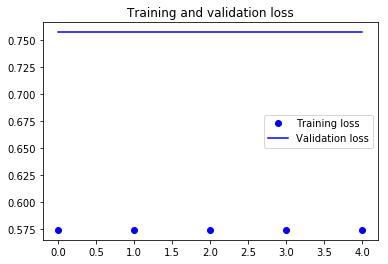

In [75]:
# Plotting Loss / Performance
loss = res.history['loss']
val_loss = res.history['val_loss']
epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()



**Takeaway**: Looks like my 1-layer NN did not do a good job predicting the 'Y' outcome given 'X' valeus. Guessing it was my model configuration or lacking necessary layers. 

Would certainly appreciate feedback on this problem :) 



## Problem 4 

In [77]:
# Define number of points per cloud to be 100
num_points = 100

# Centers of clouds: 
mean1 = [-2,0]
mean2 = [0,1.7]
mean3 = [2.1,0]

# Covariance matrix - relatively large covariance to create overlap as problem states
cov = [[0.4,0],[0,0.4]]

# Cloud samples for cloud 1
X1 = np.random.multivariate_normal(mean1,cov,num_points)
X2 = np.random.multivariate_normal(mean2,cov,num_points)
X3 = np.random.multivariate_normal(mean3,cov,num_points)

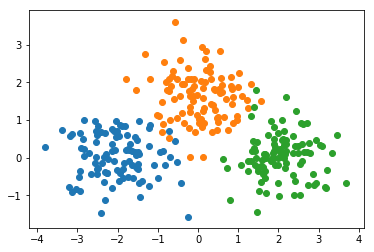

In [78]:
#visualize the clouds in 2-dimensional plot
plt.scatter(X1[:,0],X1[:,1])
plt.scatter(X2[:,0],X2[:,1])
plt.scatter(X3[:,0],X3[:,1])
plt.show()

In [134]:
# Class labels for each of 3 clouds (0,1,2) 
Y1 = 0*np.ones(num_points)
Y2 = 1*np.ones(num_points)
Y3 = 2*np.ones(num_points)

In [137]:
# Concatenate into 'X' and 'Y' arrays, one-hot encoding, and doing 80/20 train/test split 
X=np.concatenate([X1,X2,X3],axis=0)
Y=np.concatenate([Y1,Y2,Y3],axis=0) 
Y=to_categorical(Y) 
train_x, val_x, train_y, val_y = train_test_split(X,Y, test_size=0.2, random_state = 7)

In [123]:
# Checking shapes of input/output arrays, as this will affect 'units' argument in output layer of NN model 
X.shape
Y.shape

(300, 2)

(300, 3)

In [138]:
# Building 2-layer NN model 

model = Sequential()
model.add(Dense(50, input_shape=(2,)))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(3,)) # Set this 'units' argument = 3 b/c output 'Y' has shape (,3) 
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 50)                150       
_________________________________________________________________
activation_44 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 50)                2550      
_________________________________________________________________
activation_45 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 3)                 153       
_________________________________________________________________
activation_46 (Activation)   (None, 3)                 0         
Total params: 2,853
Trainable params: 2,853
Non-trainable params: 0
_________________________________________________________________


In [139]:
# Model compile and model fit (trained model called 'clouds')

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
clouds = model.fit(train_x,train_y,
                    batch_size=30,
                    epochs=5,
                    shuffle=True,
                    verbose=1,
                    validation_data=(val_x, val_y))

Train on 240 samples, validate on 60 samples
Epoch 1/5
240/240 [==============================] - 0s 2ms/step - loss: 1.0523 - acc: 0.4917 - val_loss: 0.9648 - val_acc: 0.6667
Epoch 2/5
240/240 [==============================] - 0s 47us/step - loss: 0.8715 - acc: 0.6750 - val_loss: 0.8094 - val_acc: 0.7333
Epoch 3/5
240/240 [==============================] - 0s 50us/step - loss: 0.7282 - acc: 0.8292 - val_loss: 0.6844 - val_acc: 0.8333
Epoch 4/5
240/240 [==============================] - 0s 73us/step - loss: 0.6107 - acc: 0.8833 - val_loss: 0.5767 - val_acc: 0.8667
Epoch 5/5
240/240 [==============================] - 0s 82us/step - loss: 0.5087 - acc: 0.9333 - val_loss: 0.4854 - val_acc: 0.9000


<Figure size 432x288 with 0 Axes>

Text(0.5,1,'Training and validation loss')

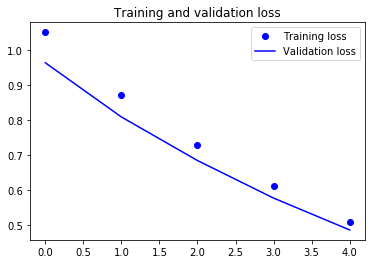

In [140]:
#Plot the results for training and validation loss
loss = clouds.history['loss']
val_loss = clouds.history['val_loss']
epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()